In [1]:
!pip install pyomo

In [15]:
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory
import numpy as np
import sys
import math
import matplotlib.pyplot as plt

In [9]:
solverpath_folder = "/Users/Nika/Desktop/ipopt/bin"
solverpath_exe = "/Users/Nika/Desktop/ipopt/bin/ipopt"
sys.path.append(solverpath_folder)

In [10]:
def optimizer_solver (x_initial, y_initial):
    model = pyo.ConcreteModel()
    model.x = pyo.Var(initialize = x_initial)
    model.y = pyo.Var(initialize = y_initial)
    x = model.x
    y = model.y
    model.obj = pyo.Objective(expr = (2 - cos(np.pi*x) - cos(np.pi*y)) * (x**2) * (y**2), sense = minimize)
    opt = SolverFactory('ipopt', executable = solverpath_exe)
    opt.solve(model)
    x_value = pyo.value(x)
    y_value = pyo.value(y)
    J = pyo.value(model.obj)
    return x_value, y_value, J

In [12]:
x_0 = np.arange(0,4, 0.5)
y_0 = np.arange(0,4, 0.5)
x_list = []
y_list = []
objective = []
for x in x_0:
    for y in y_0:
        x_value, y_value, J = optimizer_solver (x, y)
        x_list.append(x)
        y_list.append(y)
        objective.append(J)
        print('x0 = ', x, ', and y0 = ', y, ': Optimum Value = ', J)

x0 =  0.0 , and y0 =  0.0 : Optimum Value =  0.0
x0 =  0.0 , and y0 =  0.5 : Optimum Value =  0.0
x0 =  0.0 , and y0 =  1.0 : Optimum Value =  0.0
x0 =  0.0 , and y0 =  1.5 : Optimum Value =  0.0
x0 =  0.0 , and y0 =  2.0 : Optimum Value =  0.0
x0 =  0.0 , and y0 =  2.5 : Optimum Value =  0.0
x0 =  0.0 , and y0 =  3.0 : Optimum Value =  0.0
x0 =  0.0 , and y0 =  3.5 : Optimum Value =  0.0
x0 =  0.5 , and y0 =  0.0 : Optimum Value =  0.0
x0 =  0.5 , and y0 =  0.5 : Optimum Value =  3.10984807487992e-11
x0 =  0.5 , and y0 =  1.0 : Optimum Value =  6.679405957752995e-23
x0 =  0.5 , and y0 =  1.5 : Optimum Value =  6.276089308781665e-23
x0 =  0.5 , and y0 =  2.0 : Optimum Value =  5.823401522490819e-13
x0 =  0.5 , and y0 =  2.5 : Optimum Value =  3.089017941009043e-21
x0 =  0.5 , and y0 =  3.0 : Optimum Value =  2.6927114427254453e-21
x0 =  0.5 , and y0 =  3.5 : Optimum Value =  1.501427898750199e-19
x0 =  1.0 , and y0 =  0.0 : Optimum Value =  0.0
x0 =  1.0 , and y0 =  0.5 : Optimum Value

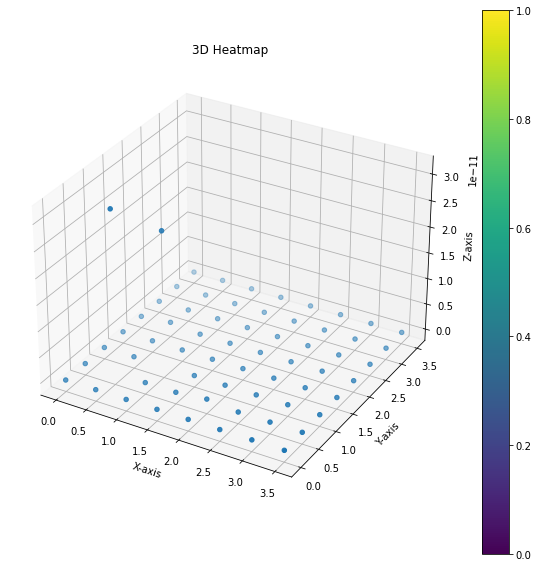

In [31]:
from mpl_toolkits.mplot3d import Axes3D
from pylab import *

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
color_map = cm.ScalarMappable()
img = ax.scatter(x_list, y_list, objective)
plt.colorbar(color_map)
ax.set_title("3D Heatmap")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

As it can be seen, different initial values result in different final objective values. Most of these final values are either 0, or very close to 0. Although as it can be seen for 2 data points, the minimum functio is about 10 times greater than the other ones, which is due to the computational complexities that occur because of the initial value.